In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')
import pathlib
directory_path = str(pathlib.Path('__notebook__').parent.resolve())


from tabularmagic import TabularMagic
from tabularmagic.ml import (LinearR, RobustLinearR, 
    SVMR, MLPR, TreeEnsembleR, KBestSelectorR)
from tabularmagic.ml import LinearC



df = pd.read_csv(f'{directory_path}/house_price_data/data.csv', 
                       index_col='Id')

display(df.head())
print('df shape:', df.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


df shape: (1460, 80)


In [2]:
tm = TabularMagic(df, test_size=0.2, name='Housing sale price data')
tm

INFO: Initialization complete. Shapes of train, test DataFrames: (1168, 80), 
      (292, 80). 


Housing sale price data 
--------------------------------------------------------------------------------
Train shape: (1168, 80)                  Test shape: (292, 80)                  
--------------------------------------------------------------------------------
Categorical variables:
  'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
  'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
  'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
  'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
  'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
  'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
  'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
  'SaleCondition' 
                                                                                
Numerical variables:
  

In [3]:
tm.eda().categorical_summary_statistics()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Statistic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
n_unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,3,4,5,6,4,4,4,6,6,6,5,2,4,4,7,5,6,3,5,5,3,3,4,4,9,6
most_common,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
least_common,C (all),Grvl,Pave,IR3,Low,NoSeWa,FR3,Sev,Blueste,RRNe,RRNn,2fmCon,2.5Fin,Shed,Metal,ImStucc,Other,BrkCmn,Fa,Po,Wood,Fa,Po,Mn,LwQ,GLQ,Floor,Po,N,FuseP,Fa,Sev,Po,2Types,Fin,Po,Ex,P,Fa,MnWw,TenC,Oth,AdjLand
n_missing,0,0,1094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,683,0,0,0,28,28,28,28,28,0,0,0,1,0,0,547,64,64,64,64,0,1162,935,1122,0,0
missing_rate,0.0,0.0,0.936644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58476,0.0,0.0,0.0,0.023973,0.023973,0.023973,0.023973,0.023973,0.0,0.0,0.0,0.000856,0.0,0.0,0.468322,0.054795,0.054795,0.054795,0.054795,0.0,0.994863,0.800514,0.960616,0.0,0.0
n,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168


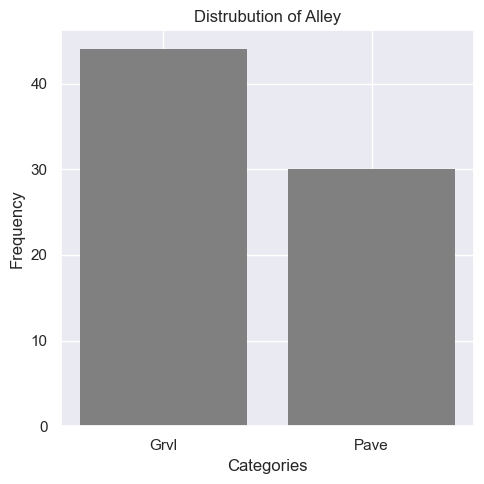

In [4]:
tm.eda().plot_distribution('Alley')

In [6]:
tm.eda('all').anova_oneway(
    numerical_var='SalePrice', stratify_by='Exterior2nd'
)

One-way ANOVA 
--------------------------------------------------------------------------------
f-statistic: 17.501                        p-value: 0.0                          
--------------------------------------------------------------------------------
H0: All group means are equal 
HA: At least one group mean is different from the others 

In [5]:
tm.eda('all').ttest(
    numerical_var='SalePrice', stratify_by='MSZoning'
)

ValueError: Invalid stratify_by: MSZoning. Must be a known binary variable.

In [21]:
tm.datahandler().force_binary(['LotConfig'], 'Inside', ignore_multiclass=True)

INFO: Forced variables 'LotConfig' to binary. Variables renamed to 
      'I_TRUE(LotConfig)'. 


Housing sale price data 
--------------------------------------------------------------------------------
Train shape: (1168, 80)                  Test shape: (292, 80)                  
--------------------------------------------------------------------------------
Categorical variables:
  'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
  'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
  'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
  'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
  'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
  'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition' 
                                                                                
Numerical variables:
  'MSSubClass', 'L

In [22]:
tm.datahandler().impute(
    include_vars=['SaleCondition', 'YrSold', 'OverallQual', 'LotArea', 
                  'SalePrice', 'LotFrontage'],
    exclude_vars=['SalePrice']
)

INFO: Imputed missing values with numerical strategy median and categorical 
      strategy most_frequent. 


Housing sale price data 
--------------------------------------------------------------------------------
Train shape: (1168, 80)                  Test shape: (292, 80)                  
--------------------------------------------------------------------------------
Categorical variables:
  'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
  'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
  'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
  'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
  'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
  'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition' 
                                                                                
Numerical variables:
  'MSSubClass', 'L

In [43]:
tm.datahandler().scale(['SalePrice'], 'log')

INFO: Scaled variables 'SalePrice' using strategy standardize. 


Housing sale price data 
--------------------------------------------------------------------------------
Train shape: (1168, 80)                  Test shape: (292, 80)                  
--------------------------------------------------------------------------------
Categorical variables:
  'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
  'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
  'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
  'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
  'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
  'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition' 
                                                                                
Numerical variables:
  'MSSubClass', 'L

In [44]:
report = tm.ml_regression(
    models=[
        LinearR('ols'),
        LinearR('l1'), 
        LinearR('l2'), 
        # SVMR('rbf'), 
        # TreeEnsembleR('adaboost')
    ],
    y_var='SalePrice',
    X_vars=['SaleCondition', 'YrSold', 'OverallQual', 'LotArea', 'LotFrontage'],
    outer_cv=5
)

INFO: Fitting model LinearR(ols). 
INFO: Fitted model LinearR(ols). 
INFO: Fitting model LinearR(l1). 
INFO: Fitted model LinearR(l1). 
INFO: Fitting model LinearR(l2). 
INFO: Fitted model LinearR(l2). 


In [45]:
report.fit_statistics('test')

,LinearR(ols),LinearR(l1),LinearR(l2)
Statistic,,,
rmse,47865.564953,47863.444431,47711.974077
mad,30563.716923,30561.333584,30363.120839
pearsonr,0.844286,0.844305,0.845817
spearmanr,0.86841,0.868325,0.869992
r2,0.701302,0.701328,0.703216
adjr2,0.691769,0.691796,0.693744
n,292,292,292


In [46]:
report.cv_fit_statistics(True)

,LinearR(ols),LinearR(l1),LinearR(l2)
Statistic,,,
rmse,45260.638316,45311.72737,45284.328221
mad,31191.441629,31141.018692,31147.270648
pearsonr,0.813483,0.813077,0.813252
spearmanr,0.846607,0.84503,0.845942
r2,0.655806,0.654987,0.65543
adjr2,0.641953,0.641101,0.641562
n,233.6,233.6,233.6


Fold-specific fit statistics

In [30]:
report.cv_fit_statistics()

,LinearR(ols),LinearR(l1),LinearR(l2)
Statistic,,,
rmse,45210.509429,45211.659423,45234.750456
mad,31176.748954,31137.547741,31132.861869
pearsonr,0.813483,0.813421,0.813252
spearmanr,0.846607,0.846207,0.845942
r2,0.655806,0.655792,0.65543
adjr2,0.641953,0.641939,0.641562
n,233.6,233.6,233.6


Test fit statistics

In [13]:
report.fit_statistics('test')

,LinearR(ols),LinearR(l1),LinearR(l2)
Statistic,,,
rmse,49441.401328,49429.400417,49294.984302
mad,31893.192954,31879.403956,31694.256912
pearsonr,0.831046,0.831162,0.832556
spearmanr,0.85885,0.859459,0.860959
r2,0.681311,0.681465,0.683195
adjr2,0.672302,0.672461,0.67424
n,292,292,292


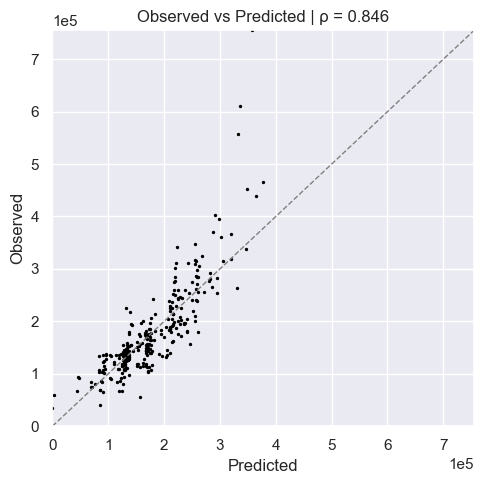

In [31]:
report.model_report('LinearR(l2)').test_report().plot_obs_vs_pred()

In [41]:
report = tm.lm(
    formula='log(SalePrice) ~ poly(SaleCondition, 4) + YrSold + OverallQual + LotArea + LotFrontage',
)

WARN: Columns 'poly(SaleCondition_AdjLand,4)3', 
      'poly(SaleCondition_AdjLand,4)2', 'poly(SaleCondition_AdjLand,4)1', 
      'poly(SaleCondition_AdjLand,4)4' not in test have been added to test with 
      0-valued entries. 


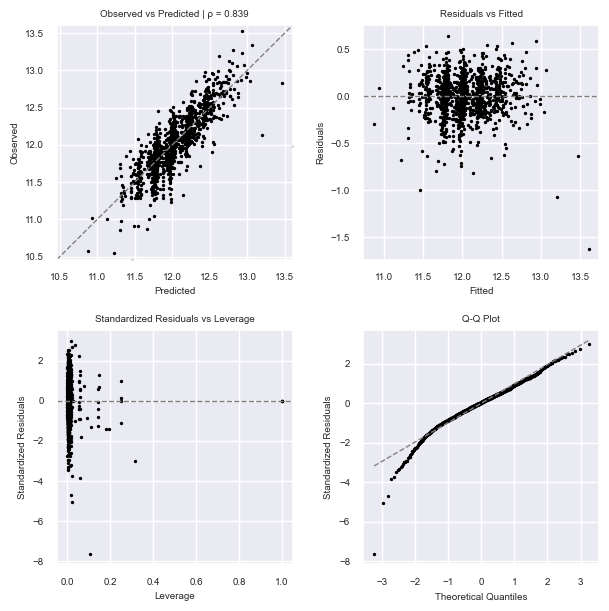

In [42]:
report.train_report().plot_diagnostics()